In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from scipy import stats, ndimage
import glob

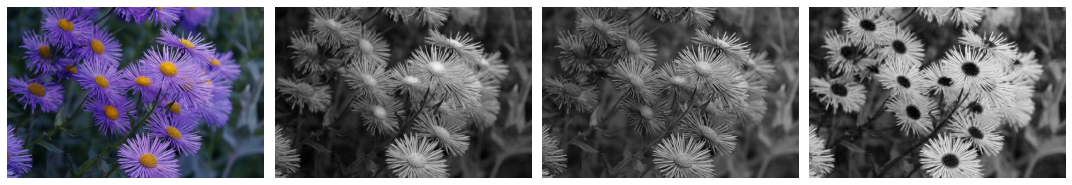

In [2]:
#Import an image and plot the three chanels separately 
fig = plt.subplots(1,4, figsize=(15,15))
image = plt.imread('salience_ex (5).png')
plt.subplot(1,4,1)
plt.imshow(image);
plt.axis('off');

for i in range(3):
    channel = image[:,:,i]
    plt.subplot(1,4,i+2);
    plt.imshow(channel, cmap='gray');
    plt.axis('off')

plt.tight_layout()

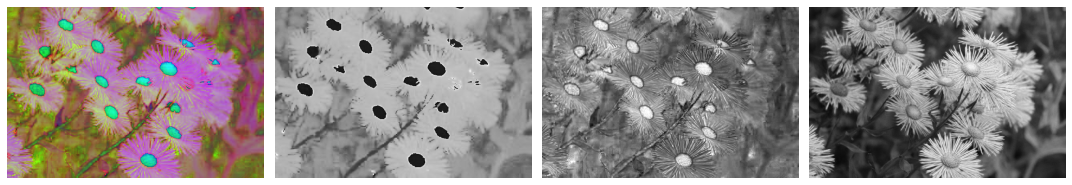

In [3]:
#Convert image from RBG to HSV and plot the three chanels separately 
fig = plt.subplots(1,4, figsize=(15,15))
hsv_image = colors.rgb_to_hsv(image)

plt.subplot(1,4,1)
plt.imshow(hsv_image);
plt.axis('off');

for i in range(3): 
    channel = hsv_image[:,:,i]
    plt.subplot(1,4,i+2);
    plt.imshow(channel, cmap='gray');
    plt.axis('off')

plt.tight_layout()

In [4]:
step = 7

def channel_saliency(hsv_image, channel):
    std = []
    (w_width, w_height) = (step, step) #size of the image patch

    for x in range(step, hsv_image.shape[0]-step, 1):
        for y in range(step, hsv_image.shape[1]-step, 1):
            window = hsv_image[x- w_width:x + w_width, y- w_height:y + w_height, channel]
            values = window.flatten()
            if channel==0: #for hue
                std_patch = stats.circstd(values, high=1)
            else: #for saturation and value
                std_patch = np.std(values)
            std.append(std_patch)

    array_std = np.asarray(std)
    saliency = array_std.reshape(hsv_image.shape[0]-2*step, hsv_image.shape[1]-2*step)
    return saliency

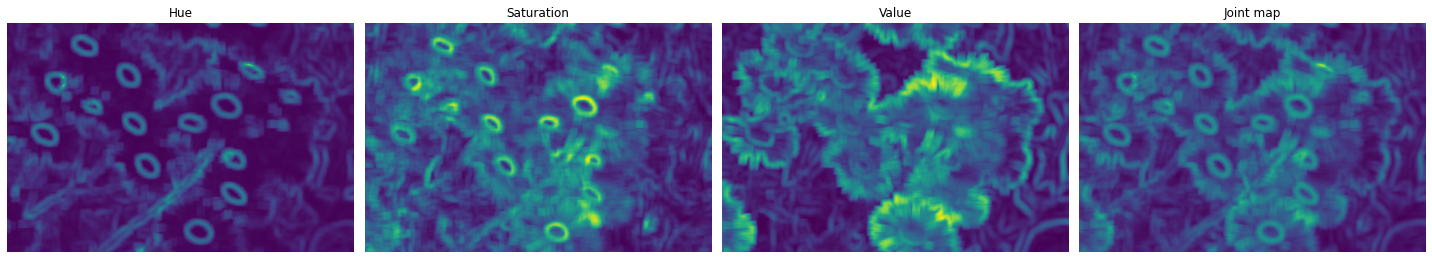

In [5]:
#Plot saliency images for each channel 
saliency_h = channel_saliency(hsv_image, channel=0)
saliency_s = channel_saliency(hsv_image, channel=1)
saliency_v = channel_saliency(hsv_image, channel=2)

fig, ax = plt.subplots(1,4,figsize=(20,20));
plt.subplot(1,4,1);
plt.imshow(saliency_h);
plt.title('Hue')
plt.axis('off');

plt.subplot(1,4,2);
plt.imshow(saliency_s);
plt.title('Saturation')
plt.axis('off');

plt.subplot(1,4,3);
plt.imshow(saliency_v);
plt.title('Value')
plt.axis('off');

#5. Compute joint saliency map
sum_sal = saliency_h + saliency_s + saliency_v
plt.subplot(1,4,4);
plt.imshow(sum_sal);
plt.title('Joint map')
plt.axis('off');

plt.tight_layout()

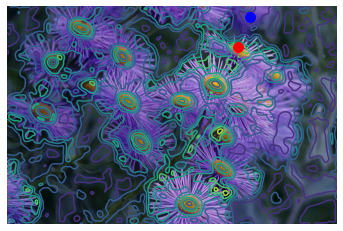

In [6]:
#8 Extract the positions the subject will most likely or least likely look at 
cut_img = image[step:-step, step:-step, :] #account for difference in size
g_sal = ndimage.gaussian_filter(sum_sal, sigma=3, mode='wrap')
sal_max = np.argmax(g_sal)
ind_sal_max = np.unravel_index(np.argmax(g_sal), (g_sal.shape[0], g_sal.shape[1]))
ind_sal_min = np.unravel_index(np.argmin(g_sal), (g_sal.shape[0], g_sal.shape[1]))
min_max = np.stack((ind_sal_max,ind_sal_min))

plt.imshow(cut_img);
plt.contour(g_sal);
plt.axis('off');
plt.plot(ind_sal_max[1], ind_sal_max[0],'ro', markersize=10); #pont most likely to look at 
plt.plot(ind_sal_min[1], ind_sal_min[0],'bo', markersize=10); #pont least likely to look at 